In [15]:
import numpy as np
from PIL import Image

In [16]:
image_path = "images/luntik.bmp"
image = Image.open(image_path)

In [17]:
width, height = image.size

`Standard Python SVD method implementation`

In [18]:
def SVD_std(color_matrix,n):
    N = (width + height) // 32 // n 
    U, S, Vt = np.linalg.svd(color_matrix, full_matrices=False)
    compressed_U = U[:,:N]
    compressed_S = np.diag(S[:N])
    compressed_Vt = Vt[:N,:]

    return compressed_U, compressed_S, compressed_Vt

In [19]:
red, green, blue = zip(*image.getdata())

In [20]:
red_m = [red[i*width:i*width + width] for i in range(height)]
green_m = [green[i*width:i*width + width] for i in range(height)]
blue_m = [blue[i*width:i*width + width] for i in range(height)]

In [21]:
def new_matrix(name, red, green, blue):
    r_f = np.array(red).flatten()
    g_f = np.array(green).flatten()
    b_f = np.array(blue).flatten()

    new_pixels = list(zip(np.rint(r_f).astype(int),np.rint(g_f).astype(int), np.rint(b_f).astype(int)))
    
    image = Image.new("RGB", (width, height))
    image.putdata(new_pixels)

    image.save(f"images/{name}.bmp")

    return image

In [22]:
def mult_2(A,B,C):
    return np.dot(A,np.dot(B,C))

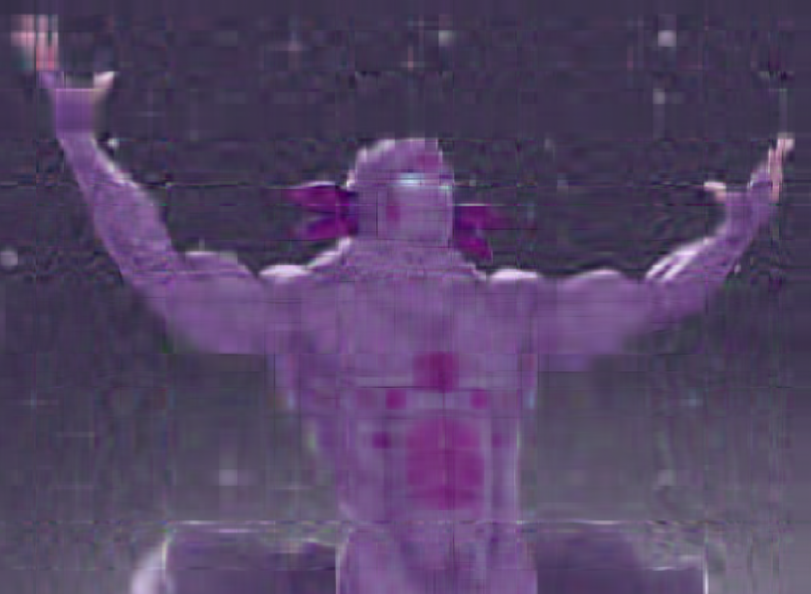

In [23]:
N = 2

r = mult_2(*list(SVD_std(np.array(red_m), N)))
g = mult_2(*list(SVD_std(np.array(green_m), N)))
b = mult_2(*list(SVD_std(np.array(blue_m), N)))

new_matrix("compressed_std",r,g,b)

In [24]:
import time
import saver
startTime = time.time()

name = "middle_repr_std.lol"
saver.create(name,width,height,N)
rn = SVD_std(red_m,N)
gn = SVD_std(green_m,N)
bn = SVD_std(blue_m,N)
saver.write_matrices(name,rn,gn,bn)

endTime = time.time()
elapsedTime = endTime - startTime

print(f'file size:{saver.file_size(name)}')
print(f'time: {elapsedTime}')

file size:701.865234375 Kbs
time: 0.5008583068847656
